In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [2]:
np.random.seed(7)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
sgd = SGD(learning_rate=0.01, momentum=0.9, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [8]:
epochs = 5
batch_size = 32
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/5
1563/1563 [==============================] - 294s 187ms/step - loss: 1.7369 - accuracy: 0.3738 - val_loss: 1.5227 - val_accuracy: 0.4393
Epoch 2/5
1563/1563 [==============================] - 307s 197ms/step - loss: 1.4010 - accuracy: 0.4935 - val_loss: 1.2562 - val_accuracy: 0.5525
Epoch 3/5
1563/1563 [==============================] - 306s 196ms/step - loss: 1.2204 - accuracy: 0.5666 - val_loss: 1.1291 - val_accuracy: 0.5987
Epoch 4/5
1563/1563 [==============================] - 287s 184ms/step - loss: 1.0885 - accuracy: 0.6150 - val_loss: 1.0803 - val_accuracy: 0.6198
Epoch 5/5
1563/1563 [==============================] - 272s 174ms/step - loss: 0.9773 - accuracy: 0.6553 - val_loss: 1.0310 - val_accuracy: 0.6390


In [9]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 63.90%


In [10]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD

In [11]:
np.random.seed(7)

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [14]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
epochs = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 586s 374ms/step - loss: 1.9017 - accuracy: 0.2974 - val_loss: 1.7525 - val_accuracy: 0.3746
Epoch 2/5
1563/1563 [==============================] - 537s 344ms/step - loss: 1.5290 - accuracy: 0.4411 - val_loss: 1.4038 - val_accuracy: 0.4963
Epoch 3/5
1563/1563 [==============================] - 543s 347ms/step - loss: 1.3975 - accuracy: 0.4929 - val_loss: 1.3044 - val_accuracy: 0.5271
Epoch 4/5
1563/1563 [==============================] - 583s 373ms/step - loss: 1.3170 - accuracy: 0.5236 - val_loss: 1.2432 - val_accuracy: 0.5481
Epoch 5/5
1563/1563 [==============================] - 581s 372ms/step - loss: 1.2539 - accuracy: 0.5489 - val_loss: 1.1973 - val_accuracy: 0.5706


In [18]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 57.06%


In [19]:
import numpy

In [20]:
predictions = model.predict(X_test[:4])

1/1 [==============================] - 0s 353ms/step


In [21]:
predicted_labels = numpy.argmax(predictions, axis=1)

In [22]:
actual_labels = numpy.argmax(y_test[:4], axis=1)

In [23]:
print("Predicted labels:", predicted_labels)
print("Actual labels:   ", actual_labels)

Predicted labels: [3 1 8 8]
Actual labels:    [3 8 8 0]


In [24]:
import matplotlib.pyplot as plt

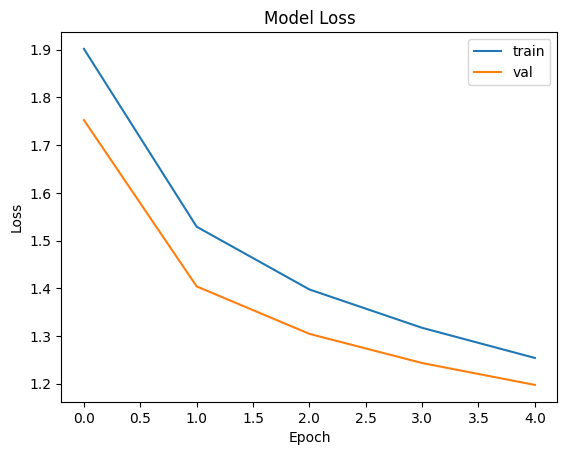

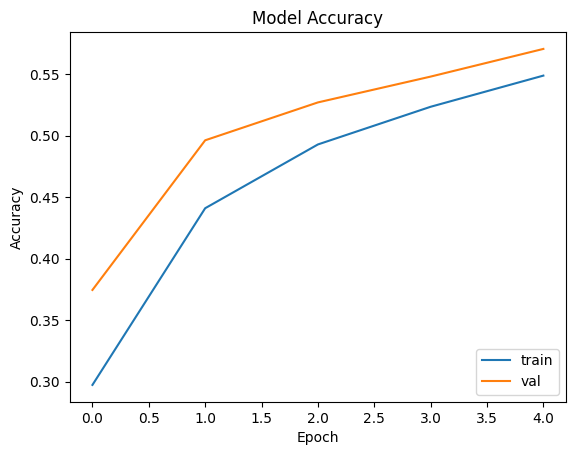

In [25]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()